<a href="https://colab.research.google.com/github/tadeo-vargas/Actividades/blob/main/AF8_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad Fundamental 8: Redes Neuronales Convolucionales**
*   Rubén Alfredo Cepeda Villegas #2049124
*   Andrés Gael Lopez Chairez #2023903
*   Miguel Angel Quiñones Rosales #2173921
*   Tadeo Isaí Sebastián Vargas #2063804
*   Angel Antonio Izaguirre Aguirre #2058212


**Hora clase: N5 Dias: LMV**





In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Cargar el conjunto de datos MNIST desde Keras

from keras.datasets import mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [ ]:
# Escalar los valores de 0-255 a 0-1

train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

In [ ]:
#Se ajusta el nivel de dimensiones

train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

In [ ]:
train_labels_cat = keras.utils.to_categorical(train_labels, 10)
test_labels_cat  = keras.utils.to_categorical(test_labels, 10)

In [ ]:
#Se crea la base convulcional

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Se compila
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Se entrena el modelo

history = model.fit(
    train_data, train_labels_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
422/422 - 41s - 97ms/step - accuracy: 0.9300 - loss: 0.2408 - val_accuracy: 0.9780 - val_loss: 0.0704
Epoch 2/10
422/422 - 41s - 96ms/step - accuracy: 0.9808 - loss: 0.0643 - val_accuracy: 0.9872 - val_loss: 0.0451
Epoch 3/10
422/422 - 39s - 92ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9882 - val_loss: 0.0433
Epoch 4/10
422/422 - 39s - 92ms/step - accuracy: 0.9889 - loss: 0.0342 - val_accuracy: 0.9903 - val_loss: 0.0336
Epoch 5/10
422/422 - 39s - 93ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.9887 - val_loss: 0.0386
Epoch 6/10
422/422 - 39s - 92ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9893 - val_loss: 0.0402
Epoch 7/10
422/422 - 41s - 97ms/step - accuracy: 0.9944 - loss: 0.0173 - val_accuracy: 0.9913 - val_loss: 0.0327
Epoch 8/10
422/422 - 41s - 97ms/step - accuracy: 0.9948 - loss: 0.0153 - val_accuracy: 0.9898 - val_loss: 0.0347
Epoch 9/10
422/422 - 41s - 96ms/step - accuracy: 0.9960 - loss: 0.0116 - val_accuracy: 0.9900 - 

In [ ]:
#Se evalua la funcionalidad del modelo

test_loss, test_acc = model.evaluate(test_data, test_labels_cat, verbose=0)
print(f"Exactitud en datos de prueba: {test_acc*100:.2f}%")

Exactitud en datos de prueba: 99.08%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


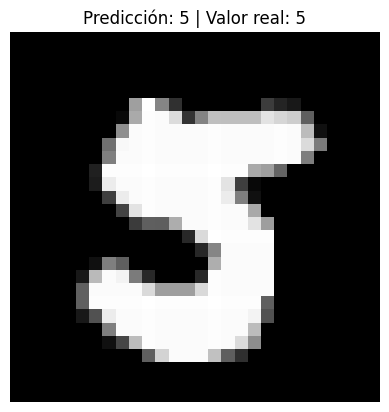

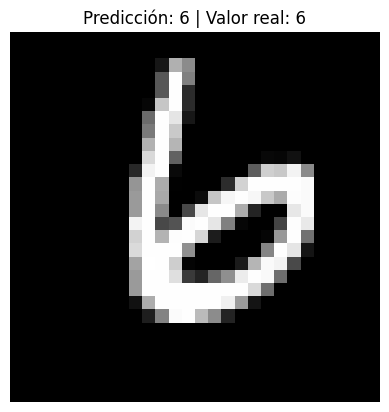

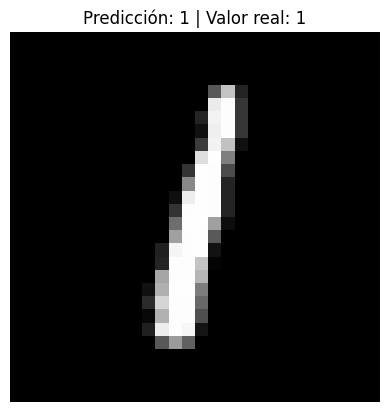

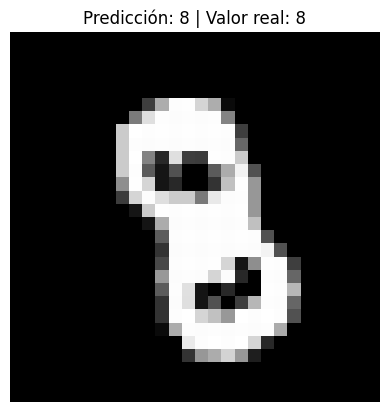

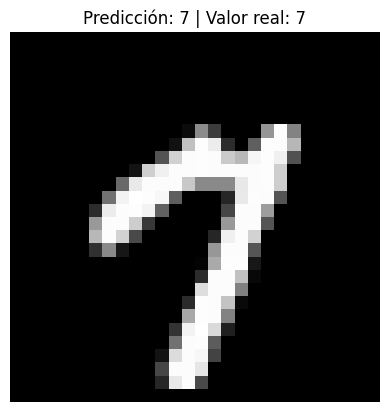

In [ ]:
#Se realizan 5 diferentes predicciones con el conjunto de datos de prueba

num_preds = 5
indices = np.random.choice(len(test_data), num_preds, replace=False)
preds = model.predict(test_data[indices])

for i, idx in enumerate(indices):
    img = test_data[idx].reshape(28,28)
    real = test_labels[idx]
    pred = np.argmax(preds[i])

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicción: {pred} | Valor real: {real}")
    plt.axis('off')
    plt.show()